<a href="https://colab.research.google.com/github/hvr2026/Hopping-Window-Mean-Aggregation/blob/main/Hopping_Window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a sample time series dataframe
data = {
'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='h'),
'value': np.random.randint(1, 10, 100)
}
df = pd.DataFrame(data)

In [3]:
# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

In [4]:
# Define hopping window parameters
window_size = '3h' # Window duration
hop_size = '1h' # Hop interval

In [5]:
# Create hopping windows
df['hopping_mean'] = df['value'].rolling(window=window_size,
min_periods=1).mean().shift(-1)

In [6]:
print(df)

                     value  hopping_mean
timestamp                               
2024-01-01 00:00:00      3      4.500000
2024-01-01 01:00:00      6      6.000000
2024-01-01 02:00:00      9      7.333333
2024-01-01 03:00:00      7      6.333333
2024-01-01 04:00:00      3      4.333333
...                    ...           ...
2024-01-04 23:00:00      9      5.666667
2024-01-05 00:00:00      3      5.000000
2024-01-05 01:00:00      3      5.000000
2024-01-05 02:00:00      9      6.000000
2024-01-05 03:00:00      6           NaN

[100 rows x 2 columns]


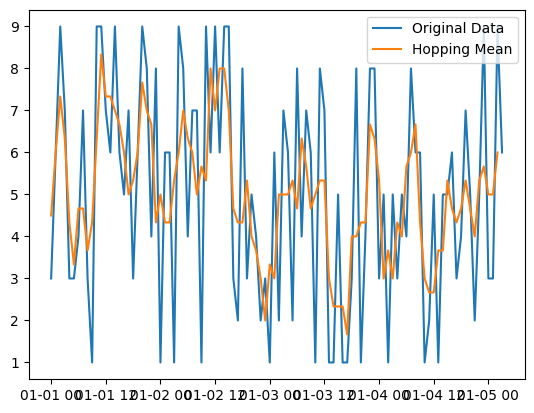

In [9]:
df = df.reset_index()
plt.plot(df['timestamp'], df['value'], label='Original Data')
plt.plot(df['timestamp'], df['hopping_mean'], label='Hopping Mean')
plt.legend()
plt.show()
